<a href="https://colab.research.google.com/github/Thayane25/PLN/blob/main/PipelineClassifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RP01 - Pipeline de Classificação de Texto

## - Elaboração de roteiro apresentado em aula

## 01 - Criação da base de dados a ser utilizada

In [51]:
#Criando a base de dados que vamos usar
import pandas as pd

#dicionário com dados de exemplo
data = {
    'texto': [
        "Este é um ótimo filme!",
        "O produto é muito ruim.",
        "Adorei o atendimento ao cliente.",
        "A entrega atrasou e o produto veio com defeito.",
        "Recomendo este livro a todos",
        "Não gostei da experiência",
        "O serviço foi excelente",
        "Péssima qualidade, não comprem",
        "Amei o presente, obrigado!",
        "Que decepção, perdi meu dinheiro."
    ],
    'categoria': [
        "positivo",
        "negativo",
        "positivo",
        "negativo",
        "positivo",
        "negativo",
        "positivo",
        "negativo",
        "positivo",
        "negativo"
    ]
}

#criar um DataFrame a partir do dicionário
df = pd.DataFrame(data)

#Salvar o DataFrame em um arquivo csv
df.to_csv('dados_rotulados.csv', index=False, encoding='utf-8')

print("Base de dados criada e salva em arquivo csv 'dados_rotulados.csv'")

Base de dados criada e salva em arquivo csv 'dados_rotulados.csv'


## 02 - Preparação dos dados

In [52]:
# Passo 1: importar as bibliotecas necessárioas
import nltk
import spacy
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Informações do conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   texto      10 non-null     object
 1   categoria  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes
None

Primeiras 5 linhas do conjunto de dados:
                                             texto categoria
0                           Este é um ótimo filme!  positivo
1                          O produto é muito ruim.  negativo
2                 Adorei o atendimento ao cliente.  positivo
3  A entrega atrasou e o produto veio com defeito.  negativo
4                     Recomendo este livro a todos  positivo


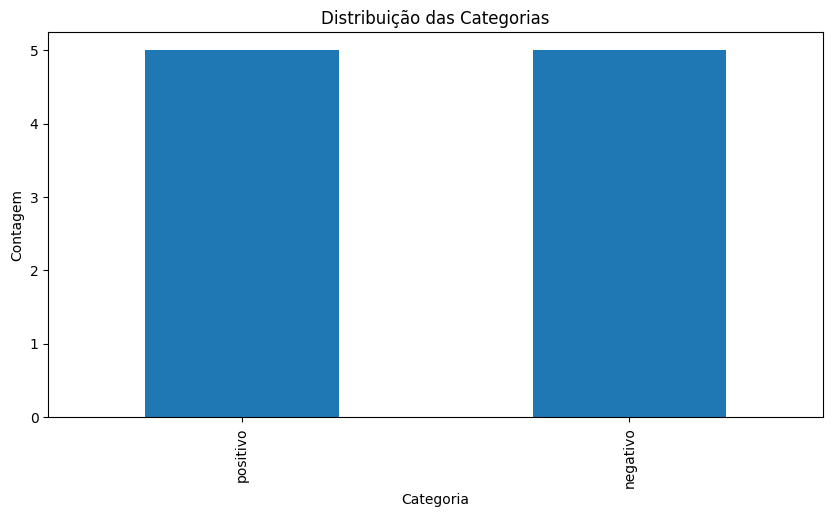

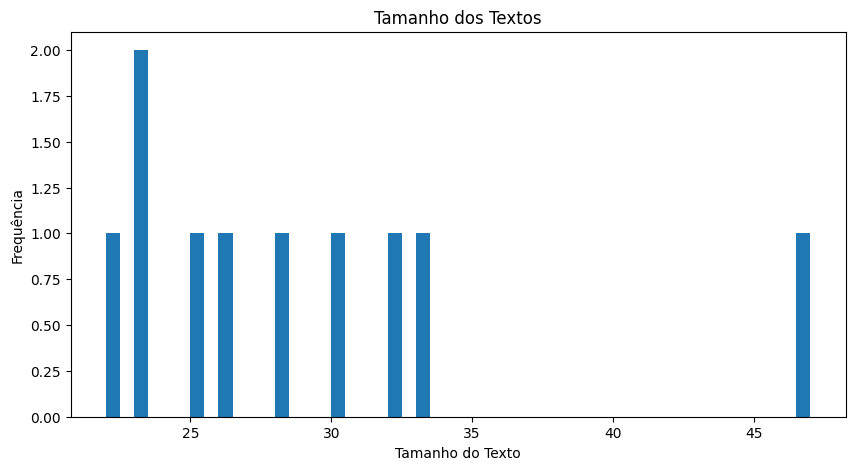


Tamanho do conjunto de treinamento: 8
Tamanho do conjunto de teste: 2


In [53]:
from tkinter.constants import Y
from re import X
# Passo 2: Carregar o conjunto de dados de texto rotulado
data = pd.read_csv('dados_rotulados.csv', encoding='utf-8')

# Passo 3: Explorar e visualizar os dados
print("Informações do conjunto de dados:")
print(data.info())

print("\nPrimeiras 5 linhas do conjunto de dados:")
print(data.head())

# Distribuição das categorias
plt.figure(figsize=(10, 5))
data['categoria'].value_counts().plot(kind='bar')
plt.title('Distribuição das Categorias')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

# Tamanho dos textos
tamanhos_textos = data['texto'].apply(len)
plt.figure(figsize=(10, 5))
plt.hist(tamanhos_textos, bins=50)
plt.title('Tamanho dos Textos')
plt.xlabel('Tamanho do Texto')
plt.ylabel('Frequência')
plt.show()

# Passo 4: Realizar o pré processamento do texto
def preprocessar_texto(texto):
  # Limpar o texto
  texto = texto.translate(str.maketrans('','', string.punctuation))
  texto = ''.join([c for c in texto if not c.isdigit()])

  # Tokenizar o texto
  tokens = word_tokenize(texto.lower())

  # Remover stopwords
  stop_words = set(stopwords.words('portuguese'))
  tokens = [palavra for palavra in tokens if palavra not in stop_words]

  # Aplicar stemming ou lematização
  stemmer = SnowballStemmer('portuguese')
  tokens = [stemmer.stem(palavra) for palavra in tokens]
  return ' '.join(tokens)

# Aplicar a função de pré-processamento à coluna 'texto' do DataFrame.
data['texto_processado'] = data['texto'].apply(preprocessar_texto)

# Passo 5: Dividor os dados em conjuntos de treinamento e teste
# Dividir o conjunto de dados em conjuntos de treinamento e teste.
# O conjunto de treinamento será usado para treinar o modelo de classificação
# o conjunto de teste será usado para avaliar o desempenho do modelo.
X_train, X_test, Y_train, Y_test = train_test_split(
    data['texto_processado'], data['categoria'], test_size=0.2, random_state=42)

# Exibir o tamanho dos conjuntos de treinamento e teste.
print("\nTamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))

## 03 - Extração de Características

In [54]:
# Importação das bibliotecas a serem utilizadas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Etapa 3: Extração de características
# Converter os textos pré-processados em representações numéricas usando TFF-IDF.
# TF-IDF é uma técnica que pondera a importância de cada palavra em um documento
# em relação à sua frequência em todo o conjunto de documentos.
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Exibir o número de características extraídas.
print("\nNúmero de características extraídas:", X_train_tfidf.shape[1])

# Etapa 4: Treinamento do modelo
# Treina um modelo de classificação Naive Bayes Multinomial usando os dados de treinamento.
# Naive Bayes é um algoritmo simples e eficaz para classificação de texto.
modelo = MultinomialNB()
modelo.fit(X_train_tfidf, Y_train)

# Etapa 5: Avaliação do modelo
# Avalia o desempenho do modelo usando o conjunto de teste.
# Calcula a acurácia e exibe um relatório de classificação detalhado.
Y_pred = modelo.predict(X_test_tfidf)
acuracia = accuracy_score(Y_test, Y_pred)
print("\nAcurácia do modelo:", acuracia)
print("\nRelatório de Classificação:\n", classification_report(Y_test, Y_pred))

# Etapa 6: Classificação de um novo texto
# Definir uma função para classificar um novo texto usando o modelo treinado.
def classificar_texto(texto, vectorizer, modelo):
  # Preprocessar o texto de entrada
  texto_processado = preprocessar_texto(texto)
  # Converter o texto pré-processado em um vetor TF-IDF
  texto_tfidf = vectorizer.transform([texto_processado])
  # Classificar o texto usando o modelo treinado
  categoria_prevista = modelo.predict(texto_tfidf)[0]
  # (Opcional) Obter as probabilidades de cada categoria
  probabilidades = modelo.predict_proba(texto_tfidf)[0]
  categorias = modelo.classes_
  probabilidades_por_categoria = dict(zip(categorias, probabilidades))
  return categoria_prevista, probabilidades_por_categoria

# Exemplo de uso da função para classificar um novo texto
novo_texto = "Este filme é incrível, recomento a todos!"
categoria, probabilidades = classificar_texto(novo_texto, vectorizer, modelo)
print("\nNovo texto:", novo_texto)
print("Categoria prevista", categoria)
print("Probabilidades por categoria:", probabilidades)


Número de características extraídas: 23

Acurácia do modelo: 0.5

Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Novo texto: Este filme é incrível, recomento a todos!
Categoria prevista positivo
Probabilidades por categoria: {np.str_('negativo'): np.float64(0.323101692144177), np.str_('positivo'): np.float64(0.676898307855823)}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Etapa 4 - Treinamento do Modelo

In [55]:
# Importação das ferramentas utilizadas
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Etapa 4: Treinamento do modelo
# Passo 1: Escolher um ou mais modelos de aprendizado de máquina para classificação
# (Naive Bayes, Regressão Logística, SVM, Transformers).
# Neste código, serão utilizados Naive Bayes, Regressão Logística e SVM.
# Passo 2: Instanciar os modelos
# Instancia os modelos de aprendizado de máquina.
naive_bayes_model = MultinomialNB()
logistic_regression_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42, probability=True)

# Passo 3: Treinar os modelos usando os dados de treinamento e as representações de texto extraídas
# Treinar os modelos com os dados de treinamento e as representações TF-IDF.
naive_bayes_model.fit(X_train_tfidf, Y_train)
logistic_regression_model.fit(X_train_tfidf, Y_train)
svm_model.fit(X_train_tfidf, Y_train)

# Passo 4: Ajustar os hiperparâmetros dos modelos usando validação cruzada (opcional)
# Definir os hiperparâmetros a serem ajustados para cada modelo.
param_grid_nb = {}  # Naive Bayes não possui hiperparâmetros significativos para ajustar
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Realizar a busca em grade com validação cruzada para encontrar os melhores hiperparâmetros.
grid_search_lr = GridSearchCV(logistic_regression_model, param_grid_lr, cv=2)
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=2)

grid_search_lr.fit(X_train_tfidf, Y_train)
grid_search_svm.fit(X_train_tfidf, Y_train)

# Imprimir os melhores hiperparâmetros encontrados.
print("\nMelhores hiperparâmetros para Regressão Logística:", grid_search_lr.best_params_)
print("Melhores hiperparâmetros para SVM:", grid_search_svm.best_params_)

# Obter os modelos com os melhores hiperparâmetros.
best_logistic_regression_model = grid_search_lr.best_estimator_
best_svm_model = grid_search_svm.best_estimator_

# Passo 4: Avaliação do modelo
# Avaliar o desempenho dos modelos usando o conjunto de teste.
# Calcular a acurácia e exibe um relatório de classificação detalhado para cada modelo.
print("\nResultados da avaliação:")

# Avaliação do modelo Naive Bayes
Y_pred_nb = naive_bayes_model.predict(X_test_tfidf)
acuracia_nb = accuracy_score(Y_test, Y_pred_nb)
print("\nNaive Bayes Multinomial:")
print("Acurácia:", acuracia_nb)
print("Relatório de Classificação:\n", classification_report(Y_test, Y_pred_nb))

# Avaliação do modelo de Regressão Logística
Y_pred_lr = best_logistic_regression_model.predict(X_test_tfidf)
acuracia_lr = accuracy_score(Y_test, Y_pred_lr)
print("\nRegressão Logística:")
print("Acurácia:", acuracia_lr)
print("Relatório de Classificação:\n", classification_report(Y_test, Y_pred_lr))

# Avaliação do modelo SVM
Y_pred_svm = best_svm_model.predict(X_test_tfidf)
acuracia_svm = accuracy_score(Y_test, Y_pred_svm)
print("\nSVM:")
print("Acurácia:", acuracia_svm)
print("Relatório de Classificação:\n", classification_report(Y_test, Y_pred_svm))

# Passo 5: Classificação de um novo texto
# Definir uma função para classificar um novo texto usando o modelo treinado.
def classificar_texto(texto, vectorizer, modelo):
    # Preprocessa o texto de entrada
    texto_processado = preprocessar_texto(texto)
    # Converte o texto pré-processado em um vetor TF-IDF
    texto_tfidf = vectorizer.transform([texto_processado])
    # Classifica o texto usando o modelo treinado
    categoria_prevista = modelo.predict(texto_tfidf)[0]
    # (Opcional) Obtém as probabilidades de cada categoria
    probabilidades = modelo.predict_proba(texto_tfidf)[0]
    categorias = modelo.classes_
    probabilidades_por_categoria = dict(zip(categorias, probabilidades))

    return categoria_prevista, probabilidades_por_categoria


Melhores hiperparâmetros para Regressão Logística: {'C': 0.1, 'solver': 'liblinear'}
Melhores hiperparâmetros para SVM: {'C': 1, 'kernel': 'rbf'}

Resultados da avaliação:

Naive Bayes Multinomial:
Acurácia: 0.5
Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Regressão Logística:
Acurácia: 0.5
Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


SVM:
Acurácia: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       1.00      1.00      1.00         1
    positivo       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [56]:
# Exemplo de uso da função para classificar um novo texto
novo_texto = "Este filme é incrível, recomendo a todos!"
categoria_nb, probabilidades_nb = classificar_texto(novo_texto, vectorizer, naive_bayes_model)
categoria_lr, probabilidades_lr = classificar_texto(novo_texto, vectorizer, best_logistic_regression_model)
categoria_svm, probabilidades_svm = classificar_texto (novo_texto, vectorizer, best_svm_model)

print("\nNovo texto:", novo_texto)
print("\nResultados da classificação:")
print("\nNaive Bayes Multinomial:")
print("Categoria prevista:", categoria_nb)
print("Probabilidades por categoria:", probabilidades_nb)
print("\nRegressão Logística:")
print("Categoria prevista:", categoria_lr)
print("Probabilidades por categoria:", probabilidades_lr)
print("\nSVM")
print("Categoria prevista:", categoria_svm)
print("Probabilidades por categoria:", probabilidades_svm)


Novo texto: Este filme é incrível, recomendo a todos!

Resultados da classificação:

Naive Bayes Multinomial:
Categoria prevista: positivo
Probabilidades por categoria: {np.str_('negativo'): np.float64(0.29256806327043555), np.str_('positivo'): np.float64(0.7074319367295648)}

Regressão Logística:
Categoria prevista: positivo
Probabilidades por categoria: {'negativo': np.float64(0.4868942836287754), 'positivo': np.float64(0.5131057163712246)}

SVM
Categoria prevista: positivo
Probabilidades por categoria: {'negativo': np.float64(0.8817303978937229), 'positivo': np.float64(0.11826960210627731)}


## Etapa 5 - Avaliação do modelo


Etapa 4: Avaliação do Modelo

Resultados da Avaliação:

Naive Bayes Multinomial:
Acurácia: 0.5
Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Regressão Logística:
Acurácia: 0.5
Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


SVM:
Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       1.00      1.00      1.00         

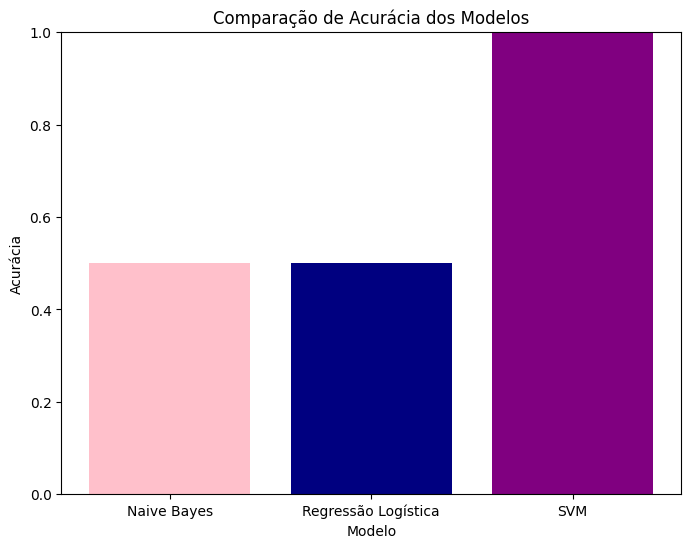

In [57]:
# Etapa 5: Avaliação do modelo
# Passo 1: Fazer previsões no conjunto de teste usando os modelos treinados.
# Passo 2: Calcular as métricas de desempenho apropriadas (precisão, revocação, F1-score, acurácia).
# Passo 3: Exibir e analisar os resultados.

print("\nEtapa 4: Avaliação do Modelo")
print("\nResultados da Avaliação:")

# Avaliação do modelo Naive Bayes
Y_pred_nb = naive_bayes_model.predict(X_test_tfidf)
acuracia_nb = accuracy_score(Y_test, Y_pred_nb)
print("\nNaive Bayes Multinomial:")
print("Acurácia:", acuracia_nb)
print("Relatório de Classificação:\n", classification_report(Y_test, Y_pred_nb, zero_division=0))

# Avaliação do modelo de Regressão Logística
Y_pred_lr = best_logistic_regression_model.predict(X_test_tfidf)
acuracia_lr = accuracy_score(Y_test, Y_pred_lr)
print("\nRegressão Logística:")
print("Acurácia:", acuracia_lr)
print("Relatório de Classificação:\n", classification_report(Y_test, Y_pred_lr, zero_division=0))

# Avaliação do modelo SVM
Y_pred_svm = best_svm_model.predict(X_test_tfidf)
acuracia_svm = accuracy_score(Y_test, Y_pred_svm)
print("\nSVM:")
print("Acurácia:", acuracia_svm)
print("Relatório de Classificação:\n", classification_report(Y_test, Y_pred_svm, zero_division=0))

# Passo 4: Comparar o desempenho dos diferentes modelos.
print("\nComparação de Modelos:")
print(f"Acurácia Naive Bayes: {acuracia_nb:.4f}")
print(f"Acurácia Regressão Logística: {acuracia_lr:.4f}")
print(f"Acurácia SVM: {acuracia_svm:.4f}")

modelos = ['Naive Bayes', 'Regressão Logística', 'SVM']
acuracias = [acuracia_nb, acuracia_lr, acuracia_svm]

plt.figure(figsize=(8, 6))
plt.bar(modelos, acuracias, color=['pink', 'navy', 'purple'])
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia dos Modelos')
plt.ylim(0, 1)  # Define o limite do eixo y para 0 a 1
plt.show()

## Etapa 6 - Classificação de um novo texto

In [58]:
print("\nEtapa 5: Classificação de um Novo Texto")

def classificar_novo_texto(texto, vectorizer, modelo):
    """
    Classifica um novo texto de entrada usando um modelo treinado.

    Args:
        texto (str): O texto a ser classificado.
        vectorizer: O vetorizador TF-IDF usado para extrair as características do texto.
        modelo: O modelo de aprendizado de máquina treinado.

    Returns:
        str: A categoria prevista para o texto.
        dict: As probabilidades de o texto pertencer a cada categoria.
    """
    # Passo 1: Pré-processar o novo texto de entrada usando as mesmas etapas da Etapa 1.
    texto_processado = preprocessar_texto(texto)

    # Passo 2: Extrair as características do novo texto usando o mesmo método da Etapa 2.
    texto_tfidf = vectorizer.transform([texto_processado])

    # Passo 3: Usar o modelo treinado para prever a categoria do novo texto.
    categoria_prestiva = modelo.predict(texto_tfidf)[0]

    # Passo 4: Exibir a categoria prevista e (opcionalmente) as probabilidades de cada categoria.
    try:
        probabilidades = modelo.predict_proba(texto_tfidf)[0]
        categorias = modelo.classes_
        probabilidades_por_categoria = dict(zip(categorias, probabilidades))
        return categoria_prestiva, probabilidades_por_categoria
    except AttributeError:
        return categoria_prestiva, {}  # Modelos como SVM podem não ter predict_proba

# Exemplo de uso da função para classificar um novo texto
novo_texto = "Este filme é incrível, recomendo a todos!"

print("\nNovo Texto:", novo_texto)
print("\nResultados da Classificação:")

# Classificar usando Naive Bayes
categoria_nb, probabilidades_nb = classificar_novo_texto(novo_texto, vectorizer, naive_bayes_model)
print("\nNaive Bayes:")
print(" Categoria Prevista:", categoria_nb)
if probabilidades_nb:
    print(" Probabilidades:", probabilidades_nb)

# Classificar usando Regressão Logística
categoria_lr, probabilidades_lr = classificar_novo_texto(novo_texto, vectorizer, best_logistic_regression_model)
print("\nRegressão Logística:")
print(" Categoria Prevista:", categoria_lr)
if probabilidades_lr:
    print(" Probabilidades:", probabilidades_lr)

# Classificar usando SVM
categoria_svm, probabilidades_svm = classificar_novo_texto(novo_texto, vectorizer, best_svm_model)
print("\nSVM:")
print(" Categoria Prevista:", categoria_svm)
if probabilidades_svm:
    print(" Probabilidades:", probabilidades_svm)


Etapa 5: Classificação de um Novo Texto

Novo Texto: Este filme é incrível, recomendo a todos!

Resultados da Classificação:

Naive Bayes:
 Categoria Prevista: positivo
 Probabilidades: {np.str_('negativo'): np.float64(0.29256806327043555), np.str_('positivo'): np.float64(0.7074319367295648)}

Regressão Logística:
 Categoria Prevista: positivo
 Probabilidades: {'negativo': np.float64(0.4868942836287754), 'positivo': np.float64(0.5131057163712246)}

SVM:
 Categoria Prevista: positivo
 Probabilidades: {'negativo': np.float64(0.8817303978937229), 'positivo': np.float64(0.11826960210627731)}
